# Getting started with Python pandas

## What is pandas?

[Pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

### Ask Python itself what is pandas!

In [11]:
import pandas
pandas?

Type:        module
String form: <module 'pandas' from '/home/fabian/.local/lib/python3.9/site-packages/pandas/__init__.py'>
File:        ~/.local/lib/python3.9/site-packages/pandas/__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted a

Want to know more? Run `pandas??`!. To save some typing pandas can be imported as pd like `import pandas as pd`. So `pd??` will do it as well.

## Go on with some real world example...

Now we import `os`, `plotly` (as plotly.express) and `pandas` modules than load our example `gapminder` dataset as `DataFrame`. Note: that this intro example is created as a jupyter-lab notebook, that is alsa exported to a python script. Results were exported to markdown and pdf. In order to render correctly in Jekyll some minor modification were needed. See the modified Jekyll  on github.

In [1]:
import os
import plotly.express as px
import pandas as pd
df = px.data.gapminder()  # n.b. there is a separate module for gapminder data
type(df)

pandas.core.frame.DataFrame

In [ ]:
Have a look at some attributes and descriptive statistics of our DataFrame. 

In [2]:
df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [8]:
df.shape  #without parents!

(1704, 8)

In [5]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)  # set number of digits
df.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.0,1704.0,1704.0,1704.0,1704.0
mean,1979.5,59.5,29601212.3,7215.3,425.9
std,17.3,12.9,106157896.7,9857.5,248.3
min,1952.0,23.6,60011.0,241.2,4.0
25%,1965.8,48.2,2793664.0,1202.1,208.0
50%,1979.5,60.7,7023595.5,3531.8,410.0
75%,1993.2,70.8,19585221.8,9325.5,638.0
max,2007.0,82.6,1318683096.0,113523.1,894.0


In [2]:
df["country"].value_counts()

Nicaragua           12
Gambia              12
Rwanda              12
Cambodia            12
Congo, Dem. Rep.    12
                    ..
Sudan               12
Swaziland           12
Peru                12
Bulgaria            12
Costa Rica          12
Name: country, Length: 142, dtype: int64

In [11]:
df["country"]

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

## Filtering DataFrame

1. Select the most recent year. 

In [14]:
df["year"].max()

2007

In [15]:
df.query('year == 2007')

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.8,31889923,974.6,AFG,4
23,Albania,Europe,2007,76.4,3600523,5937.0,ALB,8
35,Algeria,Africa,2007,72.3,33333216,6223.4,DZA,12
47,Angola,Africa,2007,42.7,12420476,4797.2,AGO,24
59,Argentina,Americas,2007,75.3,40301927,12779.4,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.2,85262356,2441.6,VNM,704
1667,West Bank and Gaza,Asia,2007,73.4,4018332,3025.3,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.7,22211743,2280.8,YEM,887
1691,Zambia,Africa,2007,42.4,11746035,1271.2,ZMB,894


We got a df with 142 rows which is equal to the number of countries. And this is so `True`.

In [21]:
len(df.country.unique()) == len(df.query('year == 2007'))

True

In [26]:
df.query('year == 2007 & continent == "Europe"')["lifeExp"].min()

71.777

What country has the highest life expectancy worldwide?

In [21]:
maxLE = df['lifeExp'].max()
df[df['lifeExp'] == maxLE]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
803,Japan,Asia,2007,82.603,127467972,31656.06806,JPN,392


What country has the highest life expectancy in each continent?

In [24]:
df.groupby("continent").max("lifeExp")

,year,lifeExp,pop,gdpPercap,iso_num
continent,,,,,
Africa,2007,76.442,135031164,21951.21176,894
Americas,2007,80.653,301139947,42951.65309,862
Asia,2007,82.603,1318683096,113523.13290,887
Europe,2007,81.757,82400996,49357.19017,826
Oceania,2007,81.235,20434176,34435.36744,554


In [25]:
df.groupby(['continent'], sort=False)['lifeExp'].max()

continent
Asia        82.603
Europe      81.757
Africa      76.442
Americas    80.653
Oceania     81.235
Name: lifeExp, dtype: float64

Well, mission completed, but we are still lack the name of the countries :-( So copy paste from [here](https://stackoverflow.com/a/15705958).

In [29]:
idx = df.groupby(['continent'])['lifeExp'].transform(max) == df['lifeExp']
df[idx]


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
71,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36
251,Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
695,Iceland,Europe,2007,81.757,301931,36180.789190,ISL,352
803,Japan,Asia,2007,82.603,127467972,31656.068060,JPN,392
1271,Reunion,Africa,2007,76.442,798094,7670.122558,REU,638


Now, look at the minimum values by continent! But remember to filter for the most recent data.

In [31]:
df2 = df.query('year == 2007')
idx = df2.groupby(['continent'])['lifeExp'].transform(min) == df2['lifeExp']
df2[idx]

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
647,Haiti,Americas,2007,60.916,8502814,1201.637154,HTI,332
1103,New Zealand,Oceania,2007,80.204,4115771,25185.009110,NZL,554
1463,Swaziland,Africa,2007,39.613,1133066,4513.480643,SWZ,748
1583,Turkey,Europe,2007,71.777,71158647,8458.276384,TUR,792


So, Turkey had the lowest life expectancy in Europe according to the example dataset.
Finally, a quick plot of the results with Pandas-only way (i.e. we shall not use `plotly` module).

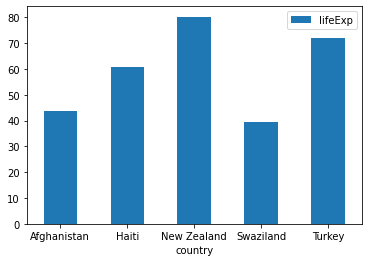

In [32]:
ax = df2[idx].plot.bar(x='country', y='lifeExp', rot=0)